In [1]:
import yaml
import random
import numpy as np
import time

from reader import Reader
from const import Const
from utils import get_F_example
from clustering import Clusters
from i_merge import IMerger

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

C:\Users\nekro\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Если есть желание создать свои данные, то вызвать этот код

In [2]:
# X, y = make_blobs(n_samples=200, centers=8, cluster_std=0.6, random_state=0)

# ids = [i+1 for i in range(len(X))]
# df = pd.DataFrame()
# df['id'] = ids
# df['X1'] = X[:,0]
# df['X2'] = X[:,1]

In [4]:
reader = Reader()

In [5]:
df = reader.read('input.xlsx')

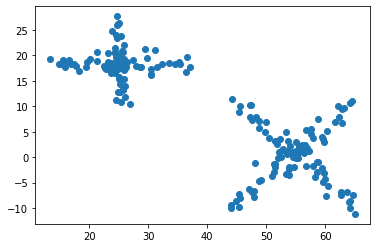

In [6]:
plt.scatter(df['X1'], df['X2'])
plt.show()

# Подбор констант

In [7]:
df.head()

id         X1         X2
0   1  25.388056  10.849605
1   2  26.102651  11.895918
2   3  24.843052  12.847889
3   4  25.282225  12.889494
4   5  26.000284  13.887626

In [8]:
const = Const()

C:\Users\nekro\Documents\Cluster\i\clusters\const.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(open("settings.yaml", 'r'))


In [9]:
const.norm(df) # Нормировка

In [10]:
const.get_norms() # Получение норм

{'X1': 3.9444263889161597, 'X2': 3.0550950818669733}

In [11]:
a = time.time()
const.calculate_a(df, type_of_optimization=3) # Вычисление а и пересчет констант
b = time.time()
print(b-a)

51.57556653022766


In [12]:
const.config # Вывод параметров

{'conturs': {'min_points': 30,
  'contour_points': 50,
  'min_diff': 3.48,
  'num_of_lenghts': 4},
 'isolated_cluster': {'constU1': 0.05,
  'min_len': 0.24,
  'min_dif': 3.48,
  'divider': 2,
  'max_div_num': 8,
  'merge_threshold': 1.75},
 'knots': {'min_fuses_num': 15, 'stop_const': 0.24},
 'consts': {'percent_for_norms': 40,
  'round_const': 2,
  'const': 0.25,
  'percent_X': 5,
  'down_steps': 0,
  'up_steps': 28,
  'power_koef': 1.16,
  'percent_Y': 33,
  'threshold': 0.8,
  'Y_step': 2.5,
  'a': 0.24}}

In [13]:
# const.save_consts() #Сохранение констант в файл

In [14]:
const.config['consts']['a']

0.24

Researching dataset

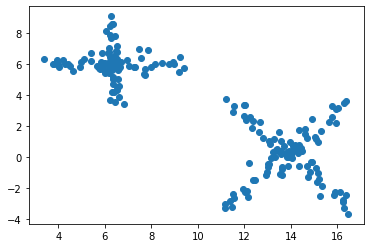

In [15]:
plt.scatter(df['X1'], df['X2']) # отрисовка данных (это просто визуализация [не касается модели])

# Кластеризация

In [16]:
cluster = Clusters(const.config) 

In [17]:
df = cluster.get_isolated_clusters(df) # Вычисление кластеров

In [18]:
set(df['cluster_id'])

{0, 1}

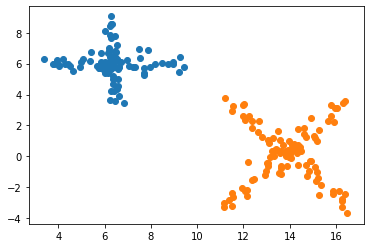

In [19]:
for cluster in set(df['cluster_id']):
    plt.scatter(df[df['cluster_id']==cluster]['X1'], df[df['cluster_id']==cluster]['X2'])


In [20]:
fig = px.scatter_3d(df, x='X1', y='X2', z='F',
              color='cluster_id')
fig.show()

In [21]:
df.head()

id        X1        X2          F  cluster_id
0   1  6.436438  3.551315  43.932999           0
1   2  6.617604  3.893796  49.181262           0
2   3  6.298267  4.205397  61.236805           0
3   4  6.409608  4.219016  65.478671           0
4   5  6.591651  4.545726  71.261279           0

# Merge I

In [22]:
Merger = IMerger(const.config)
Merger.mergeClusters(df)

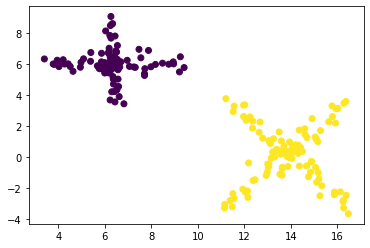

In [23]:
plt.scatter(df['X1'],df['X2'], c=df['cluster_id'])

In [24]:
fig = px.scatter_3d(df, x='X1', y='X2', z='F',
              color='cluster_id')
fig.show()

# Subclusters

In [28]:
df = df.sort_values('F')

In [30]:
df['status'] = 0